# Exploratoty Data Analysis

## Loading and Preparing data

In [2]:
#Install and Load Packages

if(!require("pacman")) install.packages("pacman")

# packages (including pacman) with pacman

pacman::p_load(pacman, magrittr, productplots, psych,

RColorBrewer, tidyverse)

# pacman: for loading/unloading packages

# magrittr: for pipes

# productplots: for sample dataset "happy"

# psych: for statistical procedures

# RColorBrewer: for color palettes

# tidyverse: for so many reasons

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



productplots installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



psych installed



In [5]:
?happy
names(happy)

[1] "id"      "happy"   "year"    "age"     "sex"     "marital" "degree" 
 [8] "finrela" "health"  "wtssall"

In [6]:
df <- happy %>%
  as_tibble() %>%
  print()

# A tibble: 51,020 x 10
      id happy     year   age sex    marital   degree    finrela  health wtssall
   <dbl> <fct>    <dbl> <dbl> <fct>  <fct>     <fct>     <fct>    <fct>    <dbl>
 1     1 not too…  1972    23 female never ma… bachelor  average  good     0.445
 2     2 not too…  1972    70 male   married   lt high … above a… fair     0.889
 3     3 pretty …  1972    48 female married   high sch… average  excel…   0.889
 4     4 not too…  1972    27 female married   bachelor  average  good     0.889
 5     5 pretty …  1972    61 female married   high sch… above a… good     0.889
 6     6 pretty …  1972    26 male   never ma… high sch… above a… good     0.445
 7     7 not too…  1972    28 male   divorced  high sch… above a… excel…   0.445
 8     8 not too…  1972    27 male   never ma… bachelor  average  good     0.445
 9     9 pretty …  1972    21 female never ma… high sch… average  excel…   0.445
10    10 pretty …  1972    30 female married   high sch… below a… fair     0.889
# … 

In [7]:
# Delete id and wtssall, which is a weighting variable that
# doesn't change results appreciably
df <- df %>%
  select(happy:health) %>%
  print()

# A tibble: 51,020 x 8
   happy        year   age sex    marital      degree       finrela     health  
   <fct>       <dbl> <dbl> <fct>  <fct>        <fct>        <fct>       <fct>   
 1 not too ha…  1972    23 female never marri… bachelor     average     good    
 2 not too ha…  1972    70 male   married      lt high sch… above aver… fair    
 3 pretty hap…  1972    48 female married      high school  average     excelle…
 4 not too ha…  1972    27 female married      bachelor     average     good    
 5 pretty hap…  1972    61 female married      high school  above aver… good    
 6 pretty hap…  1972    26 male   never marri… high school  above aver… good    
 7 not too ha…  1972    28 male   divorced     high school  above aver… excelle…
 8 not too ha…  1972    27 male   never marri… bachelor     average     good    
 9 pretty hap…  1972    21 female never marri… high school  average     excelle…
10 pretty hap…  1972    30 female married      high school  below aver… fair    
# … w

In [8]:
# Check levels of "happy"
levels(df$happy)
# Reverse levels of "happy" so "very happy" is at the top of
# stacked bar charts
df %<>%
  mutate(happy = fct_rev(happy))

levels(df$happy)

[1] "not too happy" "pretty happy"  "very happy"

[1] "very happy"    "pretty happy"  "not too happy"

## Visually Explore the Data

happy,n
<fct>,<int>
very happy,14800
pretty happy,25874
not too happy,5629
NA,4717


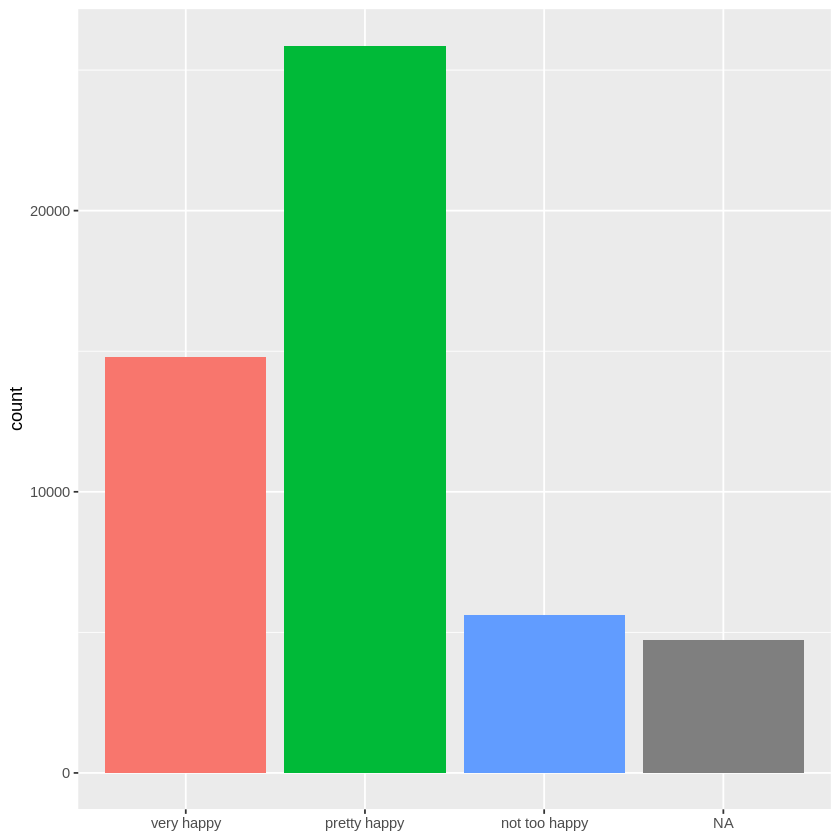

In [9]:
# Bar chart of happy
df %>%
  ggplot() + 
  geom_bar(aes(happy, fill = happy)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )
# Frequencies for happy
df %>% count(happy)

In [10]:
# Filter out the NA responses on happy
df %<>%
  filter(!is.na(happy))

# Frequencies for happy
df %>% count(happy)

happy,n
<fct>,<int>
very happy,14800
pretty happy,25874
not too happy,5629


sex,n
<fct>,<int>
male,20357
female,25946


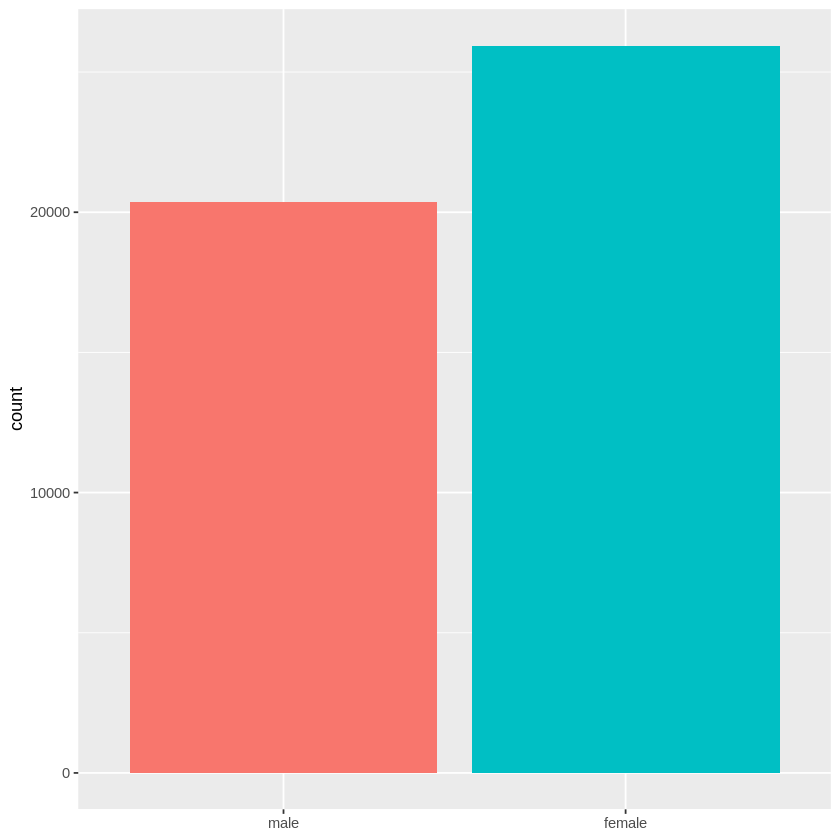

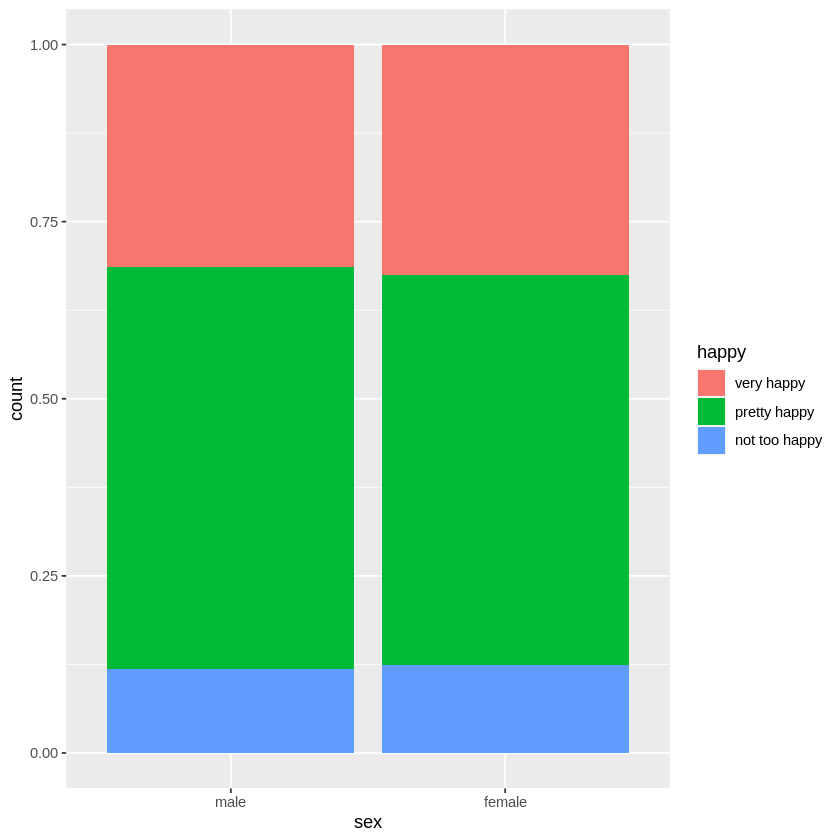

In [11]:
## Happiness and Gender
# Bar chart of sex
df %>%
  ggplot() + 
  geom_bar(aes(sex, fill = sex)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

# Frequencies for sex
df %>% count(sex)

# 100% stacked bar chart
df %>%
  ggplot(aes(sex, fill = happy)) + 
  geom_bar(position = "fill")

marital,n
<fct>,<int>
married,25662
never married,8979
divorced,5385
widowed,4652
separated,1618
NA,7


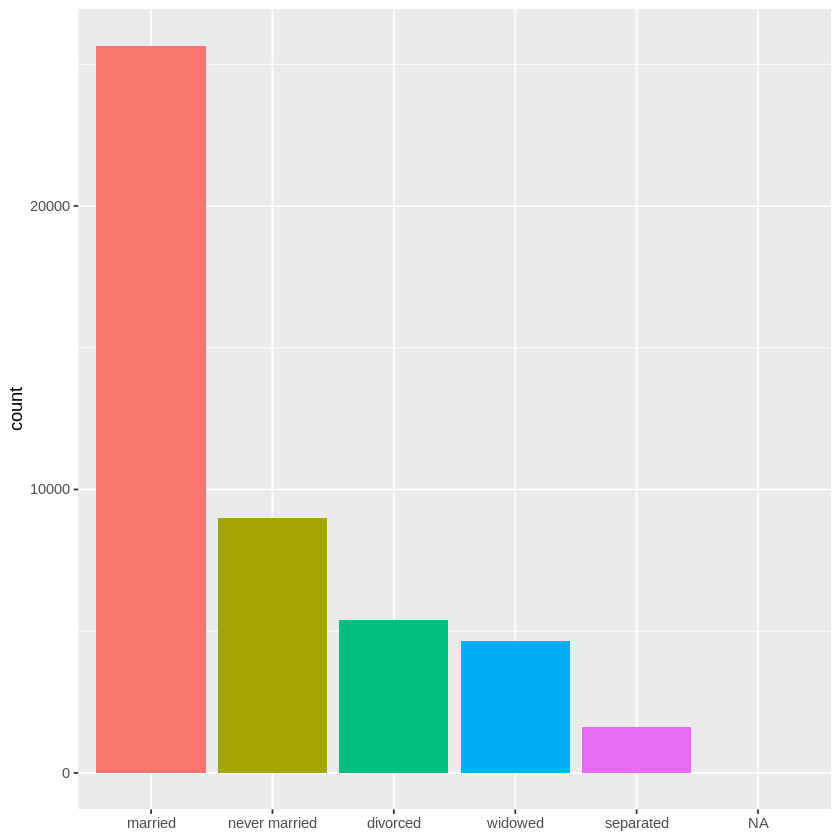

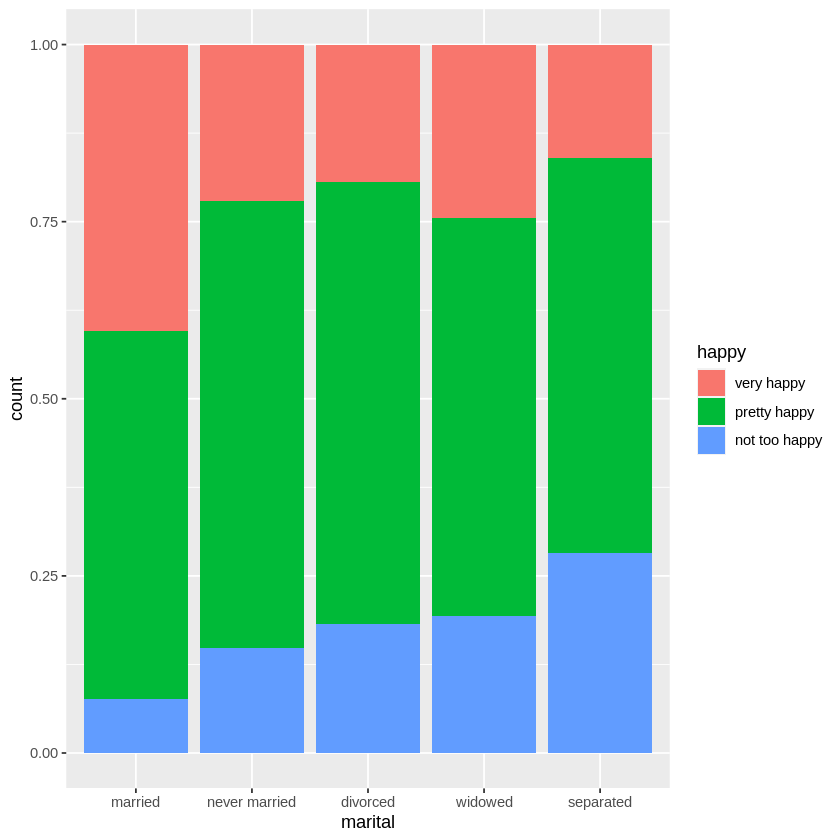

In [12]:
# HAPPINESS AND MARITAL STATUS #############################

# Bar chart of marital
df %>%
  ggplot() + 
  geom_bar(aes(marital, fill = marital)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

# Frequencies for marital
df %>% count(marital)

# 100% stacked bar chart
df %>%
  filter(!is.na(marital)) %>%
  ggplot(aes(marital, fill = happy)) + 
  geom_bar(position = "fill")

# A tibble: 46,303 x 9
   happy      year   age sex    marital    degree     finrela    health  married
   <fct>     <dbl> <dbl> <fct>  <fct>      <fct>      <fct>      <fct>   <fct>  
 1 not too …  1972    23 female never mar… bachelor   average    good    no     
 2 not too …  1972    70 male   married    lt high s… above ave… fair    yes    
 3 pretty h…  1972    48 female married    high scho… average    excell… yes    
 4 not too …  1972    27 female married    bachelor   average    good    yes    
 5 pretty h…  1972    61 female married    high scho… above ave… good    yes    
 6 pretty h…  1972    26 male   never mar… high scho… above ave… good    no     
 7 not too …  1972    28 male   divorced   high scho… above ave… excell… no     
 8 not too …  1972    27 male   never mar… bachelor   average    good    no     
 9 pretty h…  1972    21 female never mar… high scho… average    excell… no     
10 pretty h…  1972    30 female married    high scho… below ave… fair    yes    
# … w

married,n
<fct>,<int>
no,20634
yes,25662
NA,7


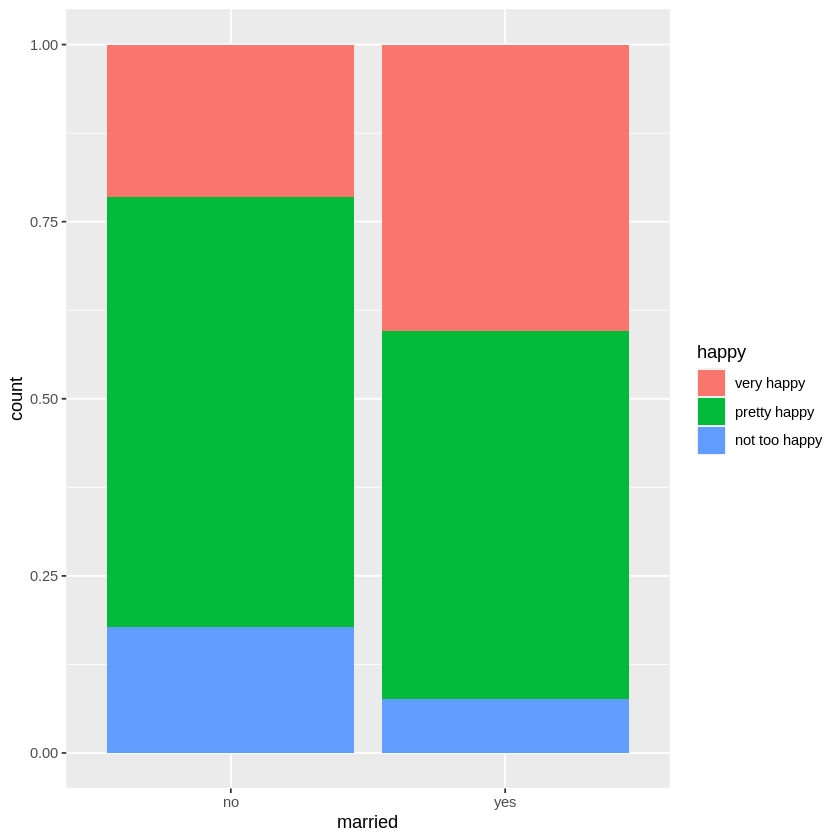

In [13]:
# Create dichotmous married/not variable
df %<>%
  mutate(
    married = ifelse(
      marital == "married",
      "yes",
      "no")
  ) %>%
  mutate(married = as.factor(married)) %>%
 print()

# Frequencies for married
df %>% count(married)

# 100% stacked bar chart
df %>%
  filter(!is.na(married)) %>%
  ggplot(aes(married, fill = happy)) + 
  geom_bar(position = "fill")
# Married group has more in "very happy" and fewer in "not
# too happy"

degree,n
<fct>,<int>
lt high school,11053
high school,23880
junior college,2252
bachelor,6134
graduate,2840
NA,144


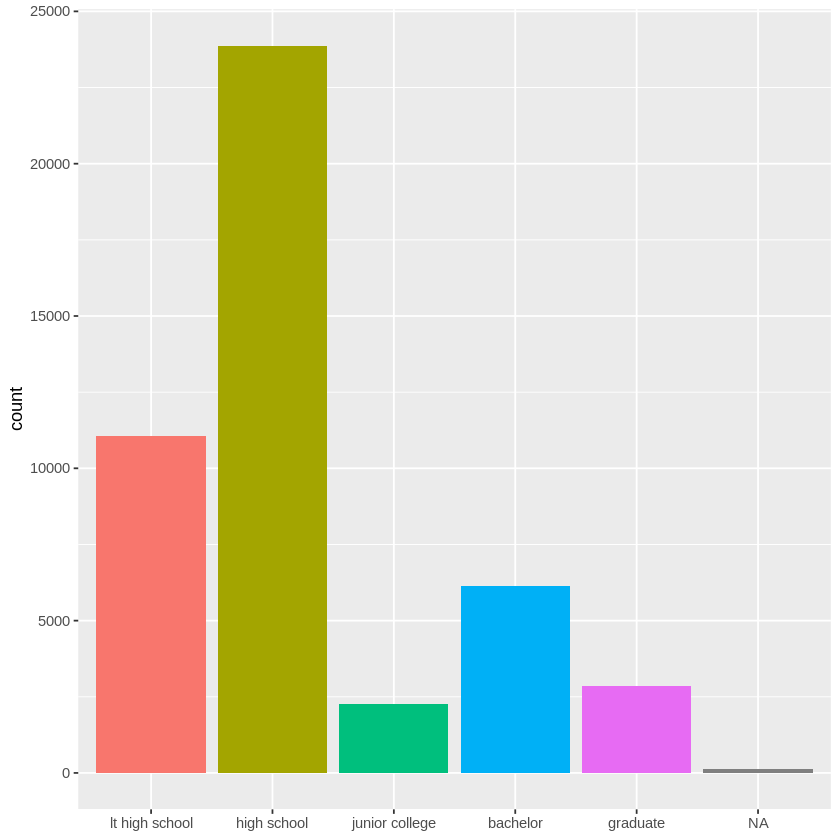

# A tibble: 46,303 x 10
   happy    year   age sex    marital   degree   finrela  health married college
   <fct>   <dbl> <dbl> <fct>  <fct>     <fct>    <fct>    <fct>  <fct>   <chr>  
 1 not to…  1972    23 female never ma… bachelor average  good   no      yes    
 2 not to…  1972    70 male   married   lt high… above a… fair   yes     no     
 3 pretty…  1972    48 female married   high sc… average  excel… yes     no     
 4 not to…  1972    27 female married   bachelor average  good   yes     yes    
 5 pretty…  1972    61 female married   high sc… above a… good   yes     no     
 6 pretty…  1972    26 male   never ma… high sc… above a… good   no      no     
 7 not to…  1972    28 male   divorced  high sc… above a… excel… no      no     
 8 not to…  1972    27 male   never ma… bachelor average  good   no      yes    
 9 pretty…  1972    21 female never ma… high sc… average  excel… no      no     
10 pretty…  1972    30 female married   high sc… below a… fair   yes     no     
# … 

college,n
<chr>,<int>
no,35077
yes,11226


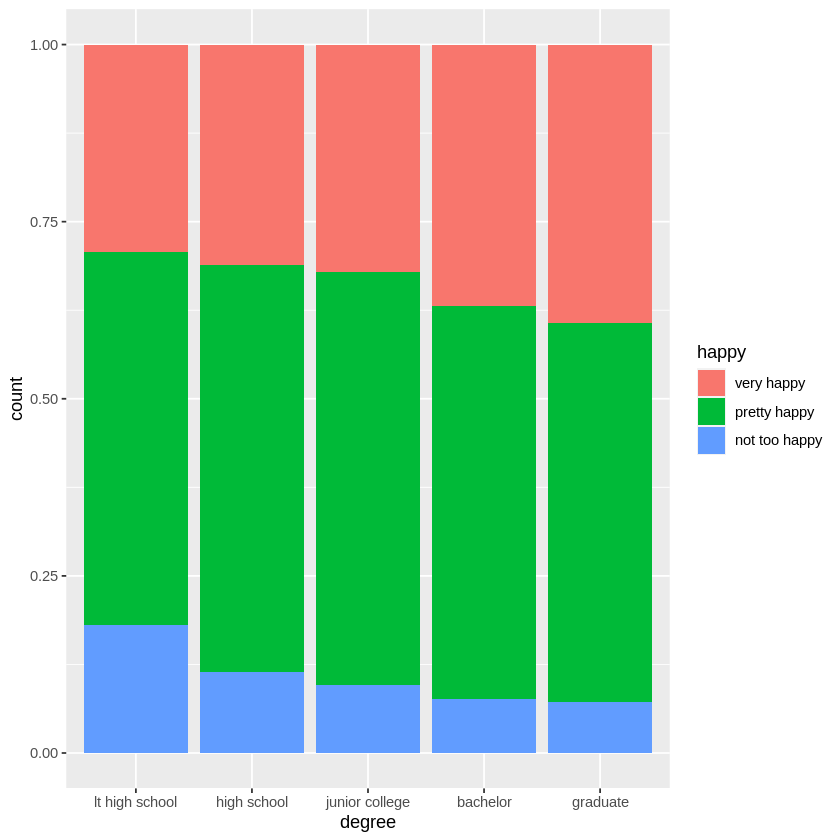

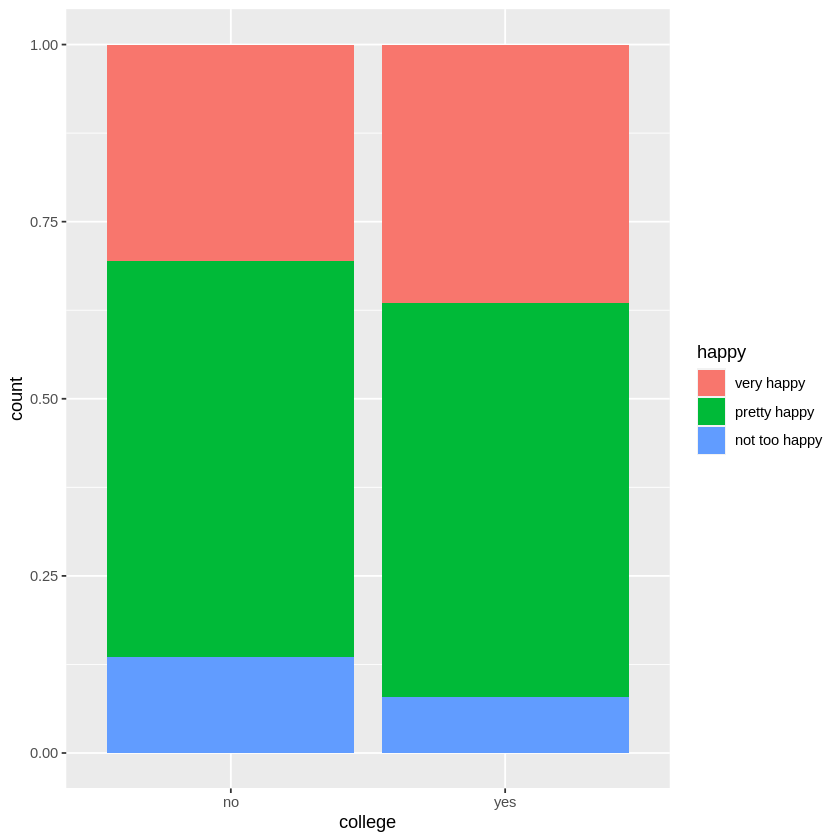

In [14]:
# Bar chart of degree
df %>%
  ggplot() + 
  geom_bar(aes(degree, fill = degree)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

# Frequencies of degree
df %>% count(degree)

# 100% stacked bar chart
df %>%
  filter(!is.na(degree)) %>%
  ggplot(aes(degree, fill = happy)) + 
  geom_bar(position = "fill")
# Things look bad for "lt high school" with only small
# differences between other groups?

# Create dichotomous college/not variable for exploration
df %<>%
  mutate(
    college = ifelse(
      degree %in%
      c("junior college",
        "bachelor",
        "graduate"),
      "yes", "no")
  ) %>%
  print()

# Frequencies of college
df %>% count(college)

# 100% stacked bar chart
df %>%
  ggplot(aes(college, fill = happy)) + 
  geom_bar(position = "fill")

finrela,n
<fct>,<int>
far below average,2408
below average,10824
average,23241
above average,8482
far above average,887
NA,461


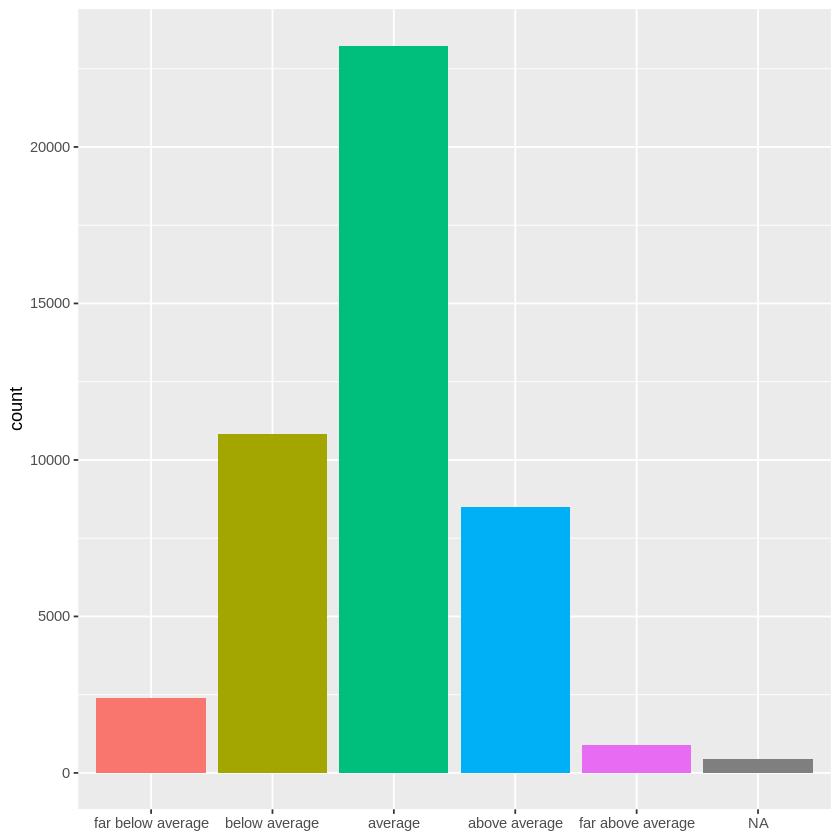

# A tibble: 46,303 x 11
   happy  year   age sex   marital degree finrela health married college avg_fin
   <fct> <dbl> <dbl> <fct> <fct>   <fct>  <fct>   <fct>  <fct>   <chr>   <chr>  
 1 not …  1972    23 fema… never … bache… average good   no      yes     yes    
 2 not …  1972    70 male  married lt hi… above … fair   yes     no      yes    
 3 pret…  1972    48 fema… married high … average excel… yes     no      yes    
 4 not …  1972    27 fema… married bache… average good   yes     yes     yes    
 5 pret…  1972    61 fema… married high … above … good   yes     no      yes    
 6 pret…  1972    26 male  never … high … above … good   no      no      yes    
 7 not …  1972    28 male  divorc… high … above … excel… no      no      yes    
 8 not …  1972    27 male  never … bache… average good   no      yes     yes    
 9 pret…  1972    21 fema… never … high … average excel… no      no      yes    
10 pret…  1972    30 fema… married high … below … fair   yes     no      no     
# … 

avg_fin,n
<chr>,<int>
no,13232
yes,32610
NA,461


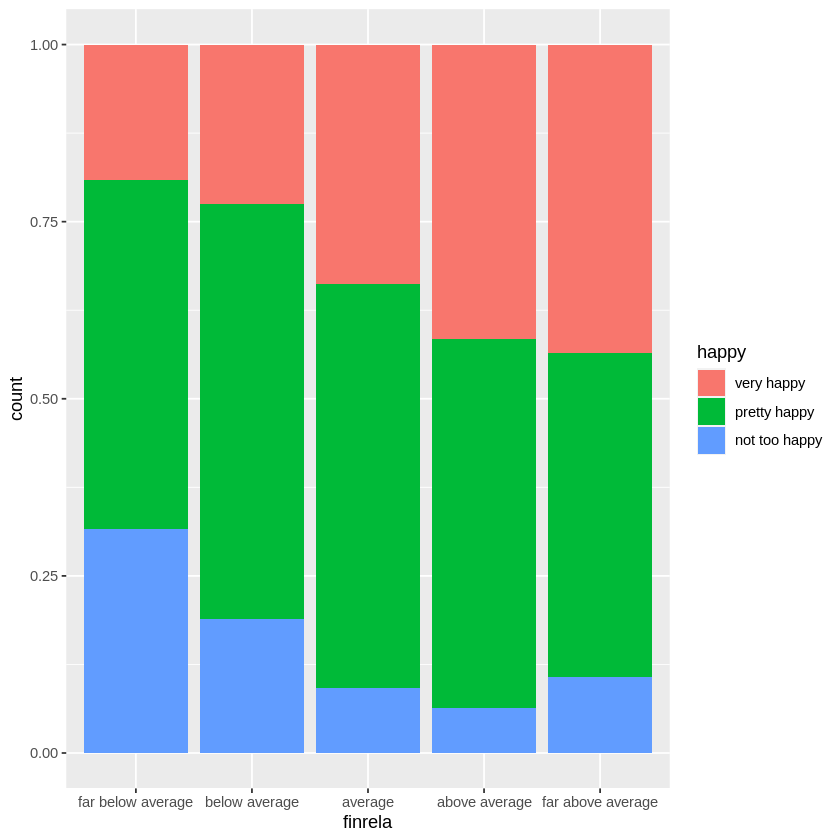

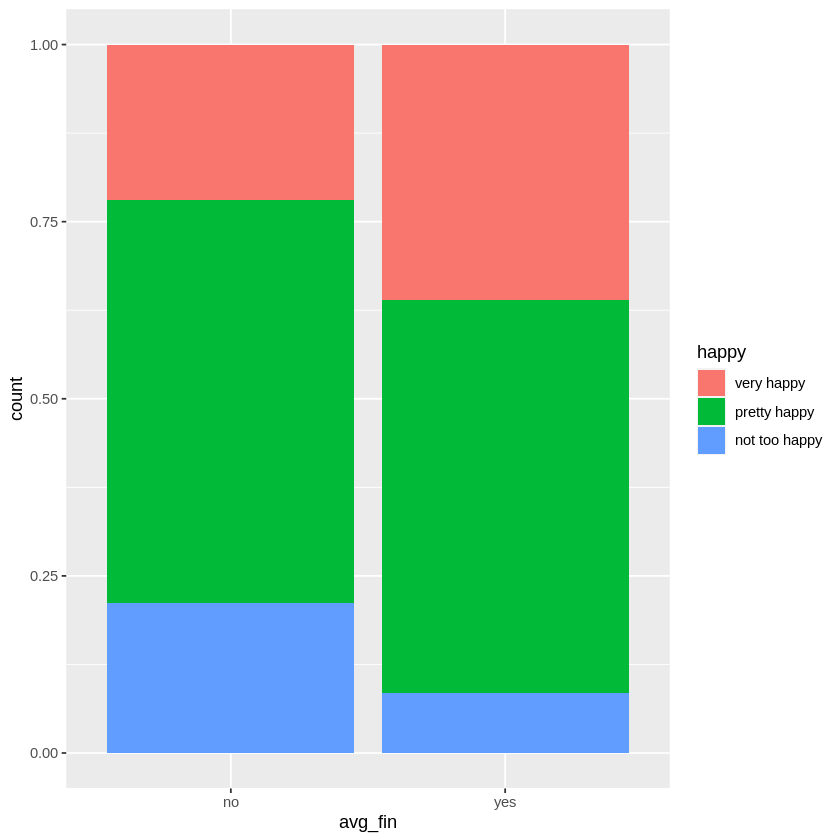

In [15]:
# HAPPINESS AND FINANCIAL STATUS ###########################

# Bar chart of finrela
df %>%
  ggplot() + 
  geom_bar(aes(finrela, fill = finrela)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

# Frequencies for finrela
df %>% count(finrela)

# 100% stacked bar chart
df %>%
  filter(!is.na(finrela)) %>%
  ggplot(aes(finrela, fill = happy)) + 
  geom_bar(position = "fill")

# Create dichotomous varible for average finances or higher
df %<>%
  mutate(
    avg_fin = case_when(
      finrela %in%
        c("far below average",
          "below average") ~
          "no",
      finrela %in%
        c("average",
          "above average",
          "far above average") ~
          "yes",
      finrela == "NA" ~ "NA")
  ) %>%
  print()

# Get frequencies
df %>% count(avg_fin)

# 100% stacked bar chart
df %>%
  filter(!is.na(avg_fin)) %>%
  ggplot(aes(avg_fin, fill = happy)) + 
  geom_bar(position = "fill")
# Big differences in both "very happy" and "not too happy"

health,n
<fct>,<int>
poor,1996
fair,6585
good,15791
excellent,11022
NA,10909


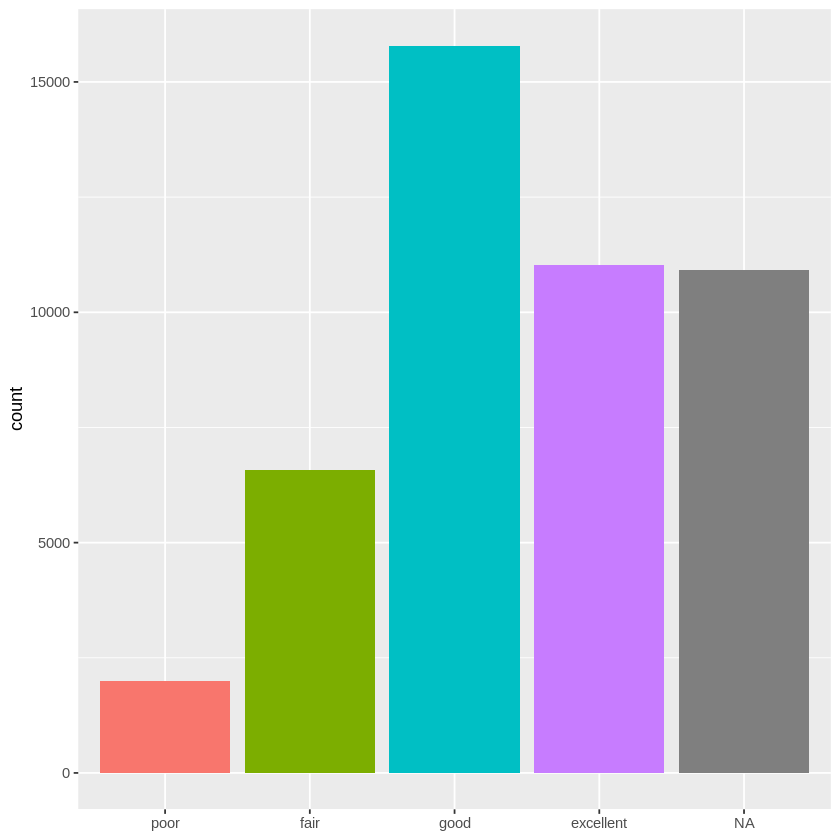

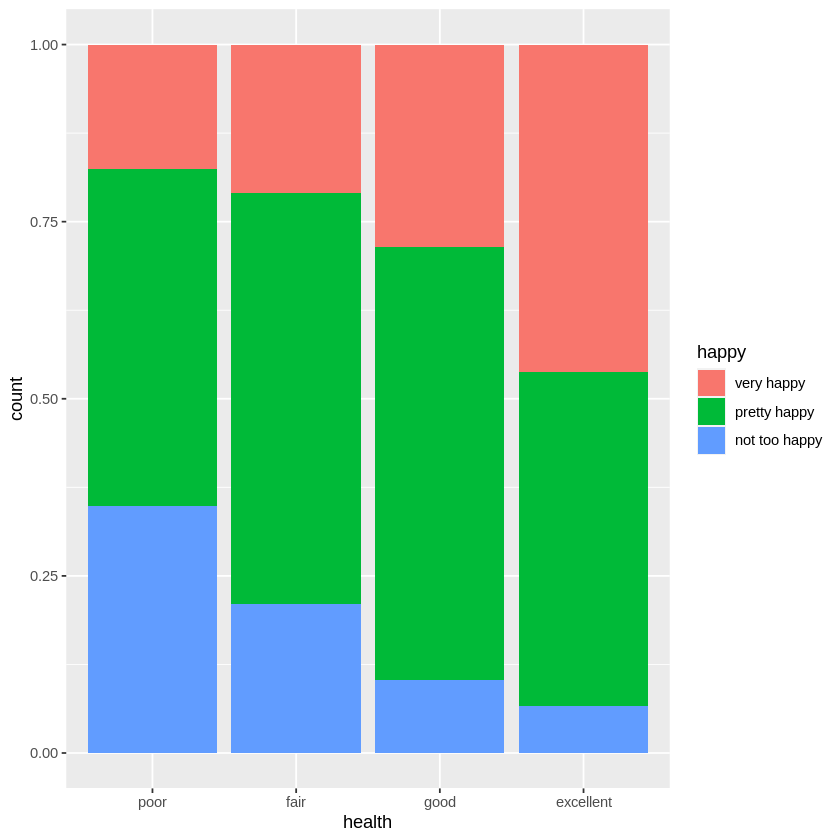

In [16]:
# HAPPINESS AND HEALTH #####################################

# Bar chart of health
df %>%
  ggplot() + 
  geom_bar(aes(health, fill = health)) + 
  theme(
    axis.title.x = element_blank(), 
    legend.position = "none"
  )

# Frequencies of health
df %>% count(health)

# 100% stacked bar chart
df %>%
  filter(!is.na(health)) %>%
  ggplot(aes(health, fill = happy)) + 
  geom_bar(position = "fill")
# Looks pretty linear; should be a good predictor as is

      year     
 Min.   :1972  
 1st Qu.:1980  
 Median :1988  
 Mean   :1989  
 3rd Qu.:1996  
 Max.   :2006  

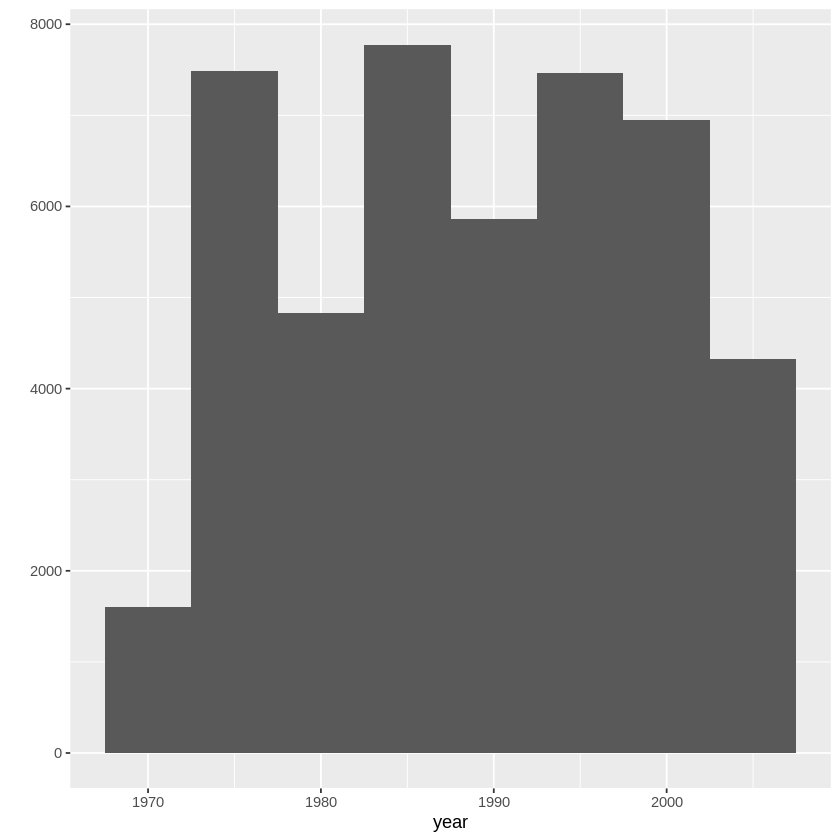

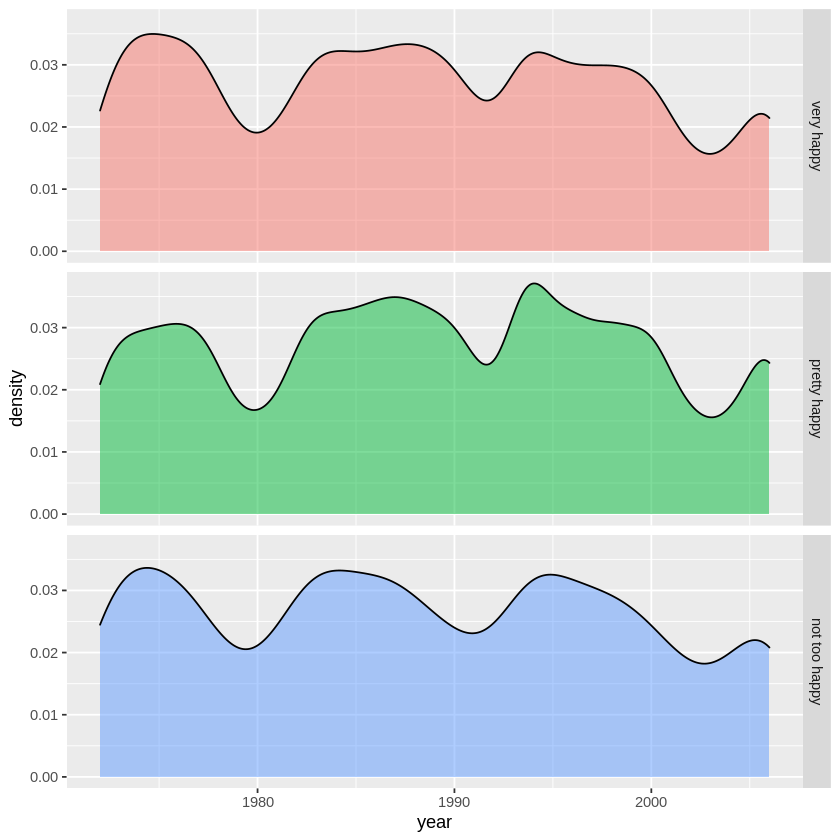

In [17]:
# HAPPINESS AND YEAR OF SURVEY #############################

# Histogram of year
df %>% qplot(year, binwidth = 5, data = .)

# Descriptive statistics for year
df %>% select(year) %>% summary()
# This the year of the survey, so it might reflect
# historical patterns or events (maybe)

# Density plots of year by group
df%>%
  ggplot(aes(x = year, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  # facet_grid
  theme(legend.position = "none")  # Turn off legend

Warning message:
“Removed 150 rows containing non-finite values (stat_bin).”


      age       
 Min.   :18.00  
 1st Qu.:31.00  
 Median :42.00  
 Mean   :45.33  
 3rd Qu.:58.00  
 Max.   :89.00  
 NA's   :150    

Warning message:
“Removed 150 rows containing non-finite values (stat_density).”


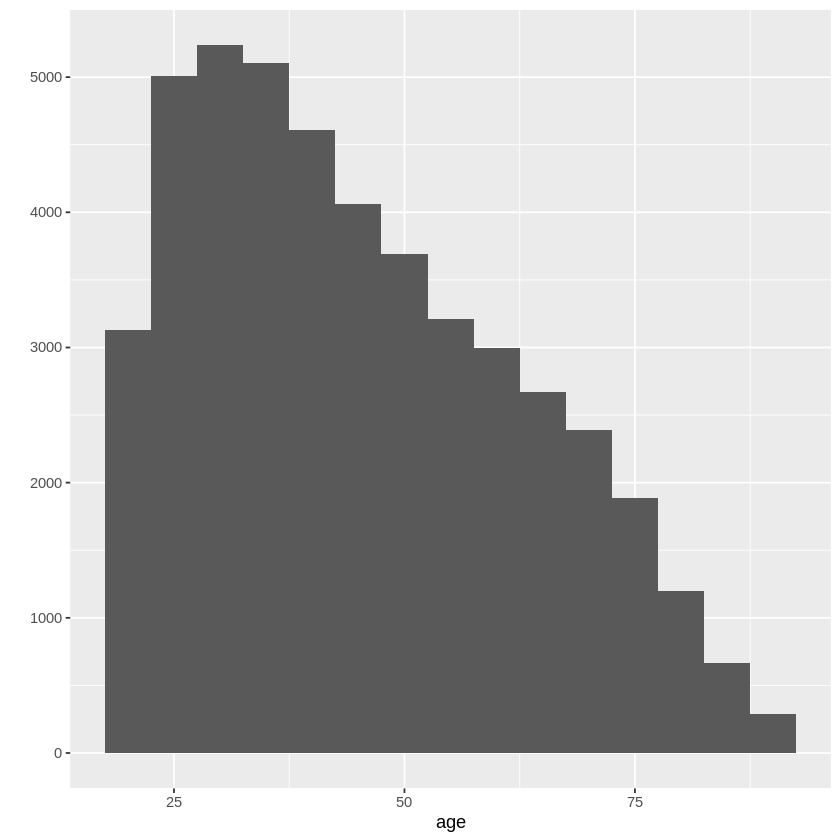

Warning message:
“Removed 150 rows containing non-finite values (stat_boxplot).”


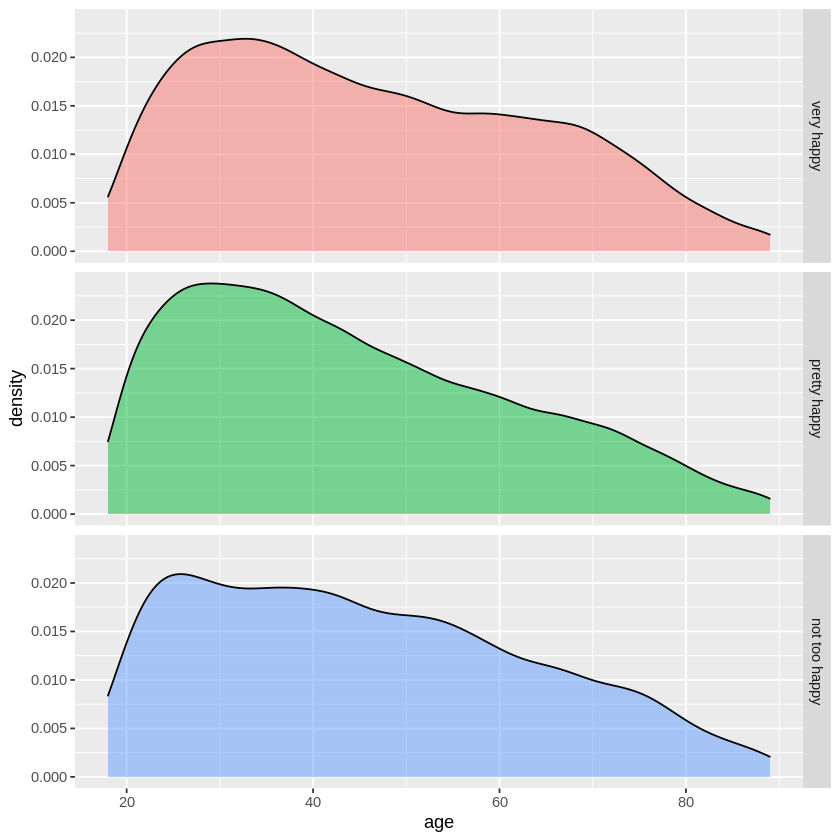

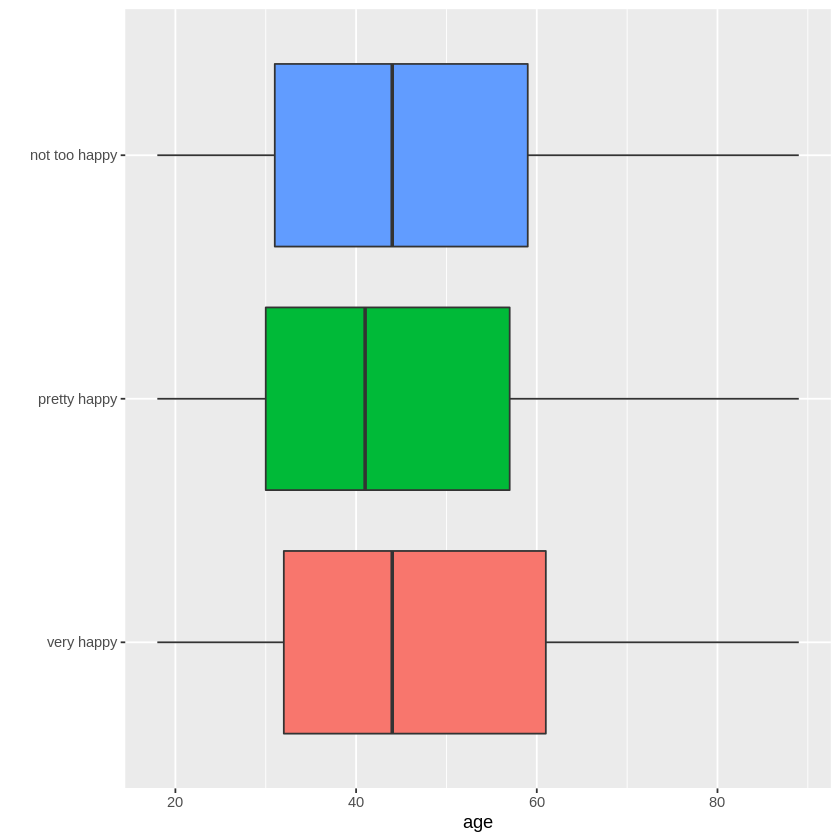

In [18]:
# HAPPINESS AND AGE ########################################

# Histogram of age
df %>% qplot(age, binwidth = 5, data = .)

# Descriptive statistics for age
df %>% select(age) %>% summary()
# Could create general age groups

# Density plots of age by group
df %>%
  ggplot(aes(x = age, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  # facet_grid
  theme(legend.position = "none")  # Turn off legend
# Maybe a bulge in "very happy" for people 55-70 years old?

# Boxplots of age by group
df %>%
  ggplot(aes(x = happy, 
    y = age, 
    fill = happy)) + 
  geom_boxplot() +
  coord_flip() +
  xlab("") +
  theme(legend.position = "none")
# No obvious differences

Warning message:
“Removed 150 rows containing non-finite values (stat_bin).”


      born     
 Min.   :1883  
 1st Qu.:1928  
 Median :1946  
 Mean   :1943  
 3rd Qu.:1958  
 Max.   :1988  
 NA's   :150   

Warning message:
“Removed 150 rows containing non-finite values (stat_density).”


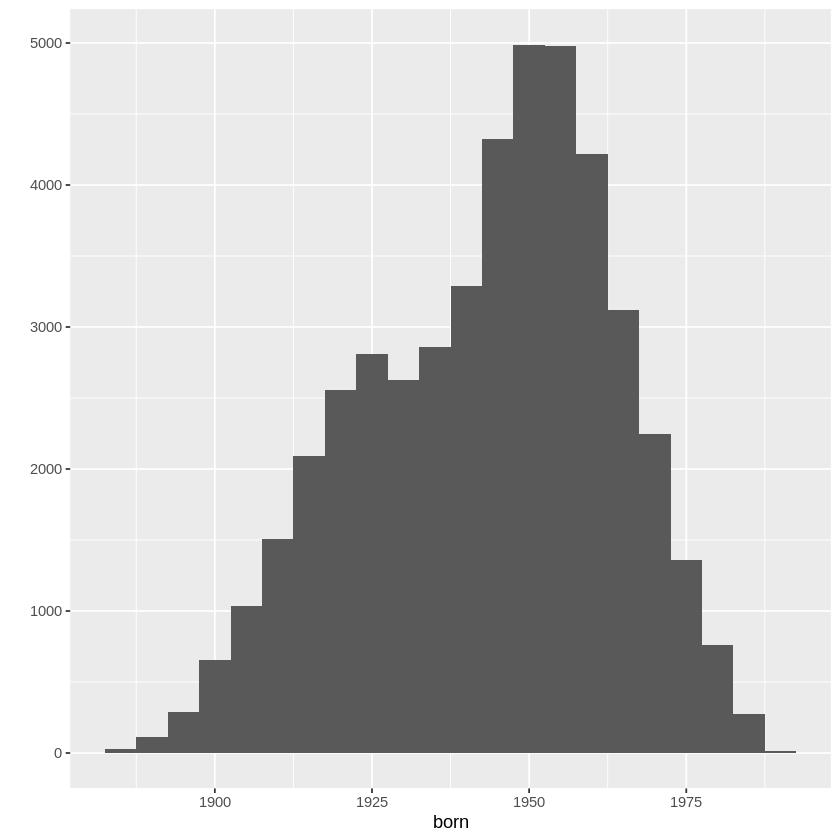

Warning message:
“Removed 150 rows containing non-finite values (stat_boxplot).”


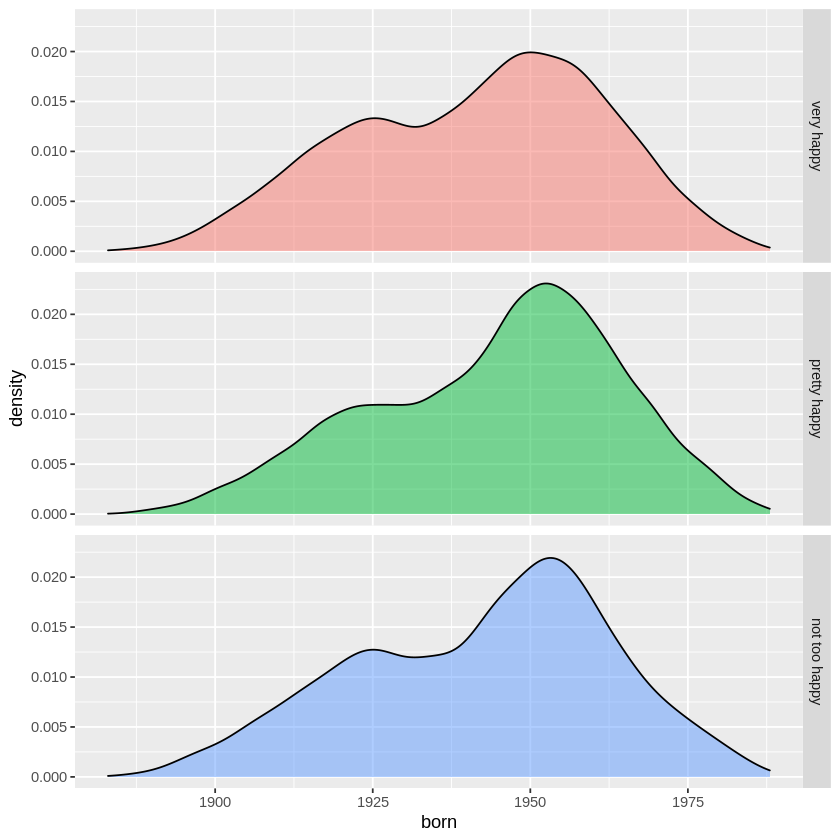

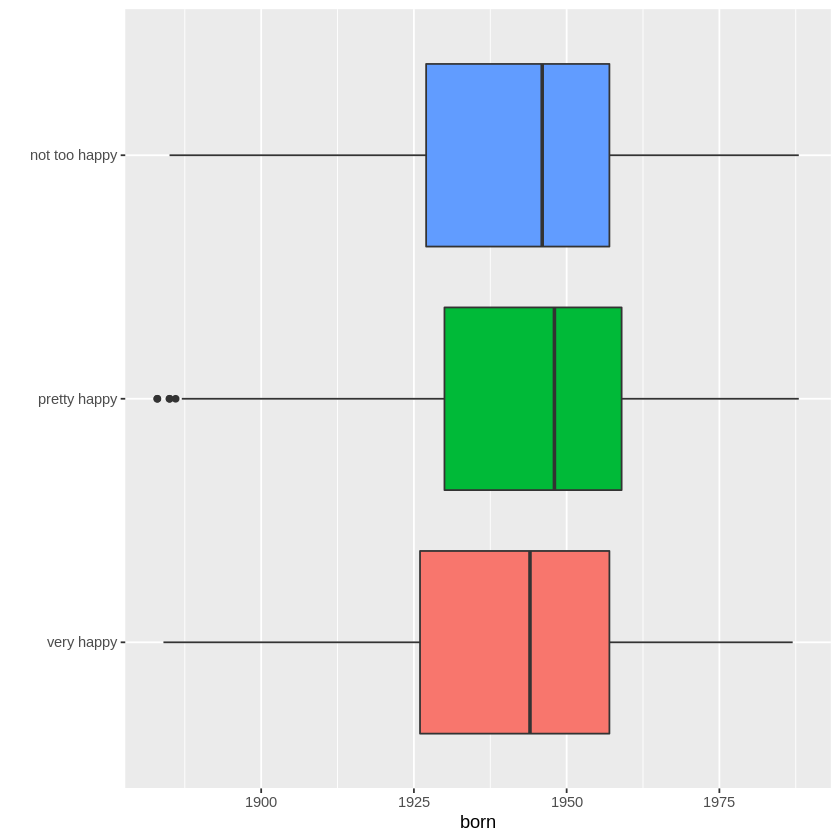

In [19]:
# HAPPINESS AND YEAR BORN ##################################

# Calculate year of birth
df %<>%
  mutate(born = year - age)

# Histogram of born
df %>% qplot(born, binwidth = 5, data = .)

# Descriptive statistics for bon
df %>% select(born) %>% summary()

# Density plots of born by group
df %>%
  ggplot(aes(x = born, 
    fill = happy)) + 
  geom_density(alpha = 0.5) +
  facet_grid(happy ~ .) +  # facet_grid
  theme(legend.position = "none")  # Turn off legend

# Boxplots of born by group
df %>%
  ggplot(aes(x = happy, 
    y = born, 
    fill = happy)) + 
  geom_boxplot() +
  coord_flip() +
  xlab("") +
  theme(legend.position = "none")

In [20]:
# CLEAN UP #################################################

# Clear data
rm(list = ls())  # Removes all objects from environment

# Clear packages
detach("package:datasets", unload = T)  # For base packages
p_unload(all)  # Remove all contributed packages

# Clear plots
graphics.off()  # Clears plots, closes all graphics devices

# Clear console
cat("\014")  # Mimics ctrl+L

# Clear mind :)

The following packages have been unloaded:
forcats, stringr, dplyr, purrr, readr, tidyr, tibble, ggplot2, tidyverse, RColorBrewer, psych, productplots, magrittr, pacman


